In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import datetime as dt
import string

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 15000)
pd.set_option('display.max_colwidth', -1)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

/Users/abbieschindler/opt/anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


### RFID data

#### Get paths for files to process

In [2]:
#create list of dir paths
RFID_path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID/build_3.0/RFID'
    
RFID_file_names = os.listdir(RFID_path)

RFID_data_dir_paths = []

for file in RFID_file_names:
    int_path = RFID_path + '/' + file
    RFID_data_dir_paths.append(int_path)
    
RFID_data_dir_paths

['/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID/build_3.0/RFID/Idspyder-21.08.17.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID/build_3.0/RFID/Idspyder-21.08.11.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID/build_3.0/RFID/Idspyder-21.08.13.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID/build_3.0/RFID/Idspyder-21.08.23.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID/build_3.0/RFID/Idspyder-21.08.31.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID/build_3.0/RFID/Idspyder-21.08.26.csv']

#### Clean df and combine into 1

In [3]:
data_RFID = pd.DataFrame()

for path in RFID_data_dir_paths[4:]:
    print(path)
    
    #create data table
    data_RFID_int = pd.read_csv(path, sep=';', encoding='utf-16')
    data_RFID_int = pd.DataFrame(data = data_RFID_int)
    data_RFID_int = data_RFID_int.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
    
    data_RFID_int['file'] = path.split('/')[-1]
    print(data_RFID_int.shape)
    
    #drop rows with no event duration
    data_RFID_int = data_RFID_int[~data_RFID_int['eventDuration'].isna()]
    
    #convert from ms to sec
    data_RFID_int['eventDuration'] = data_RFID_int['eventDuration']/1000
    #clean up and create datetime columns
    data_RFID_int['start_datetime'] = pd.to_datetime(data_RFID_int['DateTime'], unit='d')
    #can't figure out datetime format so hard code for now
    data_RFID_int['RFID_datetime_start'] = [x.replace(year = 2021) - dt.timedelta(days = 2) for x in data_RFID_int['start_datetime']] 
    data_RFID_int['RFID_date'] = data_RFID_int['RFID_datetime_start'].dt.date 
    data_RFID_int['RFID_day'] = data_RFID_int['RFID_datetime_start'].dt.day 
    data_RFID_int['RFID_time_start'] = [x.split(' ')[1] for x in data_RFID_int['RFID_datetime_start'].dt.strftime("%Y-%m-%d %H:%M:%S")]
    data_RFID_int['RFID_hour'] = data_RFID_int['RFID_datetime_start'].dt.hour
    data_RFID_int['RFID_min'] = data_RFID_int['RFID_datetime_start'].dt.minute
    data_RFID_int['RFID_second'] = data_RFID_int['RFID_datetime_start'].dt.second

    if data_RFID.empty:
        data_RFID = data_RFID_int
    else:
        data_RFID = pd.concat([data_RFID, data_RFID_int], axis=0)
        
    print(data_RFID.shape,'\n')

#clean columns
data_RFID = data_RFID[['file', 'IdRFID', 'unitLabel', 'eventDuration',
       'RFID_datetime_start', 'RFID_date',
       'RFID_day', 'RFID_time_start', 'RFID_hour', 'RFID_min', 'RFID_second']]
    
data_RFID.head()

/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID/build_3.0/RFID/Idspyder-21.08.31.csv
(30536, 15)
(30534, 23) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID/build_3.0/RFID/Idspyder-21.08.26.csv
(14177, 15)
(44710, 23) 



,file,IdRFID,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_second
17,Idspyder-21.08.31.csv,041A5559D0,AM1-8,2.158,2021-08-31 14:42:33.441033600,2021-08-31,31,14:42:33,14,42,33
18,Idspyder-21.08.31.csv,041A5552BA,AM1-8,3.690,2021-08-31 14:43:16.312972800,2021-08-31,31,14:43:16,14,43,16
19,Idspyder-21.08.31.csv,041A5559D0,AM1-3,1.715,2021-08-31 14:44:14.728012799,2021-08-31,31,14:44:14,14,44,14
20,Idspyder-21.08.31.csv,041A5559D0,AM1-3,8.111,2021-08-31 14:44:17.457993600,2021-08-31,31,14:44:17,14,44,17
21,Idspyder-21.08.31.csv,041A5559D0,AM1-4,3.276,2021-08-31 14:44:37.838976000,2021-08-31,31,14:44:37,14,44,37


#### Compute endtime 

In [4]:
#compute end time for each eventDuration
def add_duration(a, b):
    newtime = a + dt.timedelta(0, b)

    return newtime

data_RFID['RFID_datetime_end'] = data_RFID.apply(lambda row: add_duration(row['RFID_datetime_start'], row['eventDuration']), axis=1)
data_RFID['RFID_time_end'] = [x.split(' ')[1] for x in data_RFID['RFID_datetime_end'].dt.strftime("%Y-%m-%d %H:%M:%S")]

print(data_RFID.shape)
data_RFID.head()

(44710, 13)


,file,IdRFID,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_second,RFID_datetime_end,RFID_time_end
17,Idspyder-21.08.31.csv,041A5559D0,AM1-8,2.158,2021-08-31 14:42:33.441033600,2021-08-31,31,14:42:33,14,42,33,2021-08-31 14:42:35.599033600,14:42:35
18,Idspyder-21.08.31.csv,041A5552BA,AM1-8,3.690,2021-08-31 14:43:16.312972800,2021-08-31,31,14:43:16,14,43,16,2021-08-31 14:43:20.002972800,14:43:20
19,Idspyder-21.08.31.csv,041A5559D0,AM1-3,1.715,2021-08-31 14:44:14.728012799,2021-08-31,31,14:44:14,14,44,14,2021-08-31 14:44:16.443012799,14:44:16
20,Idspyder-21.08.31.csv,041A5559D0,AM1-3,8.111,2021-08-31 14:44:17.457993600,2021-08-31,31,14:44:17,14,44,17,2021-08-31 14:44:25.568993600,14:44:25
21,Idspyder-21.08.31.csv,041A5559D0,AM1-4,3.276,2021-08-31 14:44:37.838976000,2021-08-31,31,14:44:37,14,44,37,2021-08-31 14:44:41.114976000,14:44:41


#### Add next column (do for each unitLabel separately)

In [6]:
#column for if next is same Id
def next_compare(a, b):
    if a == b:
        compare = 'same'
        
    if a != b:
        compare = 'diff'

    return compare

data_RFID_next = pd.DataFrame()

for unitlabel in data_RFID['unitLabel'].unique():
    print(unitlabel)

    data_int = data_RFID[data_RFID['unitLabel'] == unitlabel].sort_values(['RFID_datetime_start'])
    data_int['RFID_datetime_start_next'] = data_int['RFID_datetime_start'].shift(-1)
    data_int['IdRFID_next'] = data_int['IdRFID'].shift(-1)
    
    data_int['IdRFID_diff_next'] = data_int.apply(lambda row: next_compare(row['IdRFID'], row['IdRFID_next']), axis=1)

    if data_RFID_next.empty:
        data_RFID_next = data_int
    else:
        data_RFID_next = pd.concat([data_RFID_next, data_int], axis=0)

data_RFID_next['time_diff_next'] = (data_RFID_next['RFID_datetime_start_next'] - data_RFID_next['RFID_datetime_end'])
data_RFID_next['time_diff_next'] = [x.total_seconds() for x in data_RFID_next['time_diff_next']]
data_RFID_next['time_diff_next_round'] = data_RFID_next['time_diff_next'].round(-1)

print(data_RFID_next.shape)
data_RFID_next.head()

AM1-8
AM1-3
AM1-4
AM1-1
AM1-2
AM1-7
AM1-9
AM1-16
AM1-5
AM1-6
AM1-12
AM1-15
AM1-13
AM1-14
AM1-10
AM1-11
(44710, 18)


,file,IdRFID,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_second,RFID_datetime_end,RFID_time_end,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,time_diff_next_round
17,Idspyder-21.08.31.csv,041A5559D0,AM1-8,2.158,2021-08-31 14:42:33.441033600,2021-08-31,31,14:42:33,14,42,33,2021-08-31 14:42:35.599033600,14:42:35,2021-08-31 14:43:16.312972800,041A5552BA,diff,40.713939,40.0
18,Idspyder-21.08.31.csv,041A5552BA,AM1-8,3.690,2021-08-31 14:43:16.312972800,2021-08-31,31,14:43:16,14,43,16,2021-08-31 14:43:20.002972800,14:43:20,2021-08-31 14:44:52.139040000,041A555DD1,diff,92.136067,90.0
23,Idspyder-21.08.31.csv,041A555DD1,AM1-8,1.306,2021-08-31 14:44:52.139040000,2021-08-31,31,14:44:52,14,44,52,2021-08-31 14:44:53.445040000,14:44:53,2021-08-31 14:45:05.758963200,041A55603C,diff,12.313923,10.0
27,Idspyder-21.08.31.csv,041A55603C,AM1-8,0.214,2021-08-31 14:45:05.758963200,2021-08-31,31,14:45:05,14,45,5,2021-08-31 14:45:05.972963200,14:45:05,2021-08-31 14:45:07.301980800,041A55603C,same,1.329017,0.0
28,Idspyder-21.08.31.csv,041A55603C,AM1-8,0.902,2021-08-31 14:45:07.301980800,2021-08-31,31,14:45:07,14,45,7,2021-08-31 14:45:08.203980800,14:45:08,2021-08-31 14:53:04.605043200,041A555DD1,diff,476.401062,480.0


#### Add day, hour, and min counts

In [7]:
#column of running day count
#do for each file separately

data_RFID_next_time = pd.DataFrame()

for file in data_RFID_next['file'].unique():
    print(file)
    d=data_RFID_next[data_RFID_next['file']==file]
    
    dat_map = dict(zip(d['RFID_date'].unique(), np.arange(1,len(d['RFID_date'].unique())+1)))
    d['RFID_day_count'] = d['RFID_date'].map(dat_map)

    #column of running min and second count within each day
    d['RFID_min_count'] = (d['RFID_hour']*60) + d['RFID_min'] 
    d['RFID_sec_count'] = (d['RFID_min_count']*60) + d['RFID_second'] 

    #column of running hour and minute count across all days
    d['RFID_hour_count_running'] = (d['RFID_day_count']*24) + d['RFID_hour'] - 24
    d['RFID_min_count_running'] = (d['RFID_hour_count_running']*60) + d['RFID_min'] 
    d['RFID_sec_count_running'] = (d['RFID_min_count_running']*60) + d['RFID_second'] - 60
    
    if data_RFID_next_time.empty:
        data_RFID_next_time = d
    else:
        data_RFID_next_time = pd.concat([data_RFID_next_time, d], axis=0)

print(data_RFID_next_time.shape)
data_RFID_next_time.head()

Idspyder-21.08.31.csv
Idspyder-21.08.26.csv
(44710, 24)


,file,IdRFID,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_second,RFID_datetime_end,RFID_time_end,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,time_diff_next_round,RFID_day_count,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running
17,Idspyder-21.08.31.csv,041A5559D0,AM1-8,2.158,2021-08-31 14:42:33.441033600,2021-08-31,31,14:42:33,14,42,33,2021-08-31 14:42:35.599033600,14:42:35,2021-08-31 14:43:16.312972800,041A5552BA,diff,40.713939,40.0,1,882,52953,14,882,52893
18,Idspyder-21.08.31.csv,041A5552BA,AM1-8,3.690,2021-08-31 14:43:16.312972800,2021-08-31,31,14:43:16,14,43,16,2021-08-31 14:43:20.002972800,14:43:20,2021-08-31 14:44:52.139040000,041A555DD1,diff,92.136067,90.0,1,883,52996,14,883,52936
23,Idspyder-21.08.31.csv,041A555DD1,AM1-8,1.306,2021-08-31 14:44:52.139040000,2021-08-31,31,14:44:52,14,44,52,2021-08-31 14:44:53.445040000,14:44:53,2021-08-31 14:45:05.758963200,041A55603C,diff,12.313923,10.0,1,884,53092,14,884,53032
27,Idspyder-21.08.31.csv,041A55603C,AM1-8,0.214,2021-08-31 14:45:05.758963200,2021-08-31,31,14:45:05,14,45,5,2021-08-31 14:45:05.972963200,14:45:05,2021-08-31 14:45:07.301980800,041A55603C,same,1.329017,0.0,1,885,53105,14,885,53045
28,Idspyder-21.08.31.csv,041A55603C,AM1-8,0.902,2021-08-31 14:45:07.301980800,2021-08-31,31,14:45:07,14,45,7,2021-08-31 14:45:08.203980800,14:45:08,2021-08-31 14:53:04.605043200,041A555DD1,diff,476.401062,480.0,1,885,53107,14,885,53047


#### Add light dark

In [8]:
def assign_ld(time):
    if (time >= 6) & (time < 18):
        return 'light'
    if (time >= 0) & (time < 6):
        return 'dark_am'
    if (time >= 18):
        return 'dark_pm'
    
data_RFID_next_time['ld_seg'] = data_RFID_next_time['RFID_hour'].apply(assign_ld)

print(data_RFID_next_time.shape)
data_RFID_next_time.head()


(44710, 25)


,file,IdRFID,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_second,RFID_datetime_end,RFID_time_end,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,time_diff_next_round,RFID_day_count,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running,ld_seg
17,Idspyder-21.08.31.csv,041A5559D0,AM1-8,2.158,2021-08-31 14:42:33.441033600,2021-08-31,31,14:42:33,14,42,33,2021-08-31 14:42:35.599033600,14:42:35,2021-08-31 14:43:16.312972800,041A5552BA,diff,40.713939,40.0,1,882,52953,14,882,52893,light
18,Idspyder-21.08.31.csv,041A5552BA,AM1-8,3.690,2021-08-31 14:43:16.312972800,2021-08-31,31,14:43:16,14,43,16,2021-08-31 14:43:20.002972800,14:43:20,2021-08-31 14:44:52.139040000,041A555DD1,diff,92.136067,90.0,1,883,52996,14,883,52936,light
23,Idspyder-21.08.31.csv,041A555DD1,AM1-8,1.306,2021-08-31 14:44:52.139040000,2021-08-31,31,14:44:52,14,44,52,2021-08-31 14:44:53.445040000,14:44:53,2021-08-31 14:45:05.758963200,041A55603C,diff,12.313923,10.0,1,884,53092,14,884,53032,light
27,Idspyder-21.08.31.csv,041A55603C,AM1-8,0.214,2021-08-31 14:45:05.758963200,2021-08-31,31,14:45:05,14,45,5,2021-08-31 14:45:05.972963200,14:45:05,2021-08-31 14:45:07.301980800,041A55603C,same,1.329017,0.0,1,885,53105,14,885,53045,light
28,Idspyder-21.08.31.csv,041A55603C,AM1-8,0.902,2021-08-31 14:45:07.301980800,2021-08-31,31,14:45:07,14,45,7,2021-08-31 14:45:08.203980800,14:45:08,2021-08-31 14:53:04.605043200,041A555DD1,diff,476.401062,480.0,1,885,53107,14,885,53047,light


#### Add day/night mapping (lines up dates and ld segments)

In [9]:
ld_mapping_path = '/Users/abbieschindler/Documents/ProgrammingFun/iPythonScripts/ld_mapping.xlsx'

ld_mapping = pd.read_excel(ld_mapping_path)
ld_mapping = pd.DataFrame(data = ld_mapping)
print(ld_mapping.shape)
ld_mapping.head()

(89, 3)


,day,ld_seg,ld
0,2,dark_am,dark_night1
1,3,dark_am,dark_night2
2,4,dark_am,dark_night3
3,5,dark_am,dark_night4
4,6,dark_am,dark_night5


In [10]:
data_RFID_next_time = data_RFID_next_time.merge(ld_mapping, right_on=['day', 'ld_seg'], left_on=['RFID_day_count', 'ld_seg'])
print(data_RFID_next_time.shape)
data_RFID_next_time.head()

(44710, 27)


,file,IdRFID,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_second,RFID_datetime_end,RFID_time_end,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,time_diff_next_round,RFID_day_count,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running,ld_seg,day,ld
0,Idspyder-21.08.31.csv,041A5559D0,AM1-8,2.158,2021-08-31 14:42:33.441033600,2021-08-31,31,14:42:33,14,42,33,2021-08-31 14:42:35.599033600,14:42:35,2021-08-31 14:43:16.312972800,041A5552BA,diff,40.713939,40.0,1,882,52953,14,882,52893,light,1,light_day1
1,Idspyder-21.08.31.csv,041A5552BA,AM1-8,3.690,2021-08-31 14:43:16.312972800,2021-08-31,31,14:43:16,14,43,16,2021-08-31 14:43:20.002972800,14:43:20,2021-08-31 14:44:52.139040000,041A555DD1,diff,92.136067,90.0,1,883,52996,14,883,52936,light,1,light_day1
2,Idspyder-21.08.31.csv,041A555DD1,AM1-8,1.306,2021-08-31 14:44:52.139040000,2021-08-31,31,14:44:52,14,44,52,2021-08-31 14:44:53.445040000,14:44:53,2021-08-31 14:45:05.758963200,041A55603C,diff,12.313923,10.0,1,884,53092,14,884,53032,light,1,light_day1
3,Idspyder-21.08.31.csv,041A55603C,AM1-8,0.214,2021-08-31 14:45:05.758963200,2021-08-31,31,14:45:05,14,45,5,2021-08-31 14:45:05.972963200,14:45:05,2021-08-31 14:45:07.301980800,041A55603C,same,1.329017,0.0,1,885,53105,14,885,53045,light,1,light_day1
4,Idspyder-21.08.31.csv,041A55603C,AM1-8,0.902,2021-08-31 14:45:07.301980800,2021-08-31,31,14:45:07,14,45,7,2021-08-31 14:45:08.203980800,14:45:08,2021-08-31 14:53:04.605043200,041A555DD1,diff,476.401062,480.0,1,885,53107,14,885,53047,light,1,light_day1


#### Map unitLabel and bottle contents

In [12]:
unitLabel_map = {'AM1-1': 'RFID_H20',
                 'AM1-2': 'RFID_EtOH05',
                 'AM1-3': 'RFID_EtOH10',
                 'AM1-4': 'RFID_EtOH20',
                 'AM1-5': 'RFID_H20',
                 'AM1-6': 'RFID_EtOH05',
                 'AM1-7': 'RFID_EtOH10',
                 'AM1-8': 'RFID_EtOH20',
                 'AM1-9': 'RFID_H20',
                 'AM1-10': 'RFID_EtOH05',
                 'AM1-11': 'RFID_EtOH10',
                 'AM1-12': 'RFID_EtOH20',
                 'AM1-13': 'RFID_H20',
                 'AM1-14': 'RFID_EtOH05',
                 'AM1-15': 'RFID_EtOH10',
                 'AM1-16': 'RFID_EtOH20',}

data_RFID_next_time['unitLabel_drink'] = data_RFID_next_time['unitLabel'].map(unitLabel_map)

print(data_RFID_next_time.shape)

(44710, 28)


#### Add metadata and clean

In [14]:
meta_path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID/meta/meta_data_3.0.xlsx'
meta_data = pd.read_excel(meta_path)
meta_data = pd.DataFrame(data = meta_data)

data_RFID_final = meta_data.merge(data_RFID_next_time.reset_index(), on='IdRFID', sort=False)

print(data_RFID_final.shape)
data_RFID_final.head()

(44710, 45)


,Round,Round_info,Sub_round,Timepoint,Cage_N,Cage,Animal,Injury,Sex,IdRFID,weight_pre,weight_post,weight_diff,notes,wes_day,wd_day,r_day,index,file,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_second,RFID_datetime_end,RFID_time_end,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,time_diff_next_round,RFID_day_count,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running,ld_seg,day,ld,unitLabel_drink
0,1,intruders,2,NaN,3,1,NaN,NaN,m,041A5554CE,27.8,NaN,NaN,NaN,NaN,NaN,NaN,2740,Idspyder-21.08.26.csv,AM1-3,2.661,2021-08-26 12:10:19.899955200,2021-08-26,26,12:10:19,12,10,19,2021-08-26 12:10:22.560955200,12:10:22,2021-08-26 12:12:56.572012800,041A5554CE,same,154.011057,150.0,1,730,43819,12,730,43759,light,1,light_day1,RFID_EtOH10
1,1,intruders,2,NaN,3,1,NaN,NaN,m,041A5554CE,27.8,NaN,NaN,NaN,NaN,NaN,NaN,2741,Idspyder-21.08.26.csv,AM1-3,11.543,2021-08-26 12:12:56.572012800,2021-08-26,26,12:12:56,12,12,56,2021-08-26 12:13:08.115012800,12:13:08,2021-08-26 12:13:09.129993600,041A5554CE,same,1.014980,0.0,1,732,43976,12,732,43916,light,1,light_day1,RFID_EtOH10
2,1,intruders,2,NaN,3,1,NaN,NaN,m,041A5554CE,27.8,NaN,NaN,NaN,NaN,NaN,NaN,2742,Idspyder-21.08.26.csv,AM1-3,8.010,2021-08-26 12:13:09.129993600,2021-08-26,26,12:13:09,12,13,9,2021-08-26 12:13:17.139993600,12:13:17,2021-08-26 12:18:39.348979200,041A555C9D,diff,322.208985,320.0,1,733,43989,12,733,43929,light,1,light_day1,RFID_EtOH10
3,1,intruders,2,NaN,3,1,NaN,NaN,m,041A5554CE,27.8,NaN,NaN,NaN,NaN,NaN,NaN,2744,Idspyder-21.08.26.csv,AM1-3,1.903,2021-08-26 12:24:31.858041600,2021-08-26,26,12:24:31,12,24,31,2021-08-26 12:24:33.761041600,12:24:33,2021-08-26 12:29:20.870016000,041A555C9D,diff,287.108974,290.0,1,744,44671,12,744,44611,light,1,light_day1,RFID_EtOH10
4,1,intruders,2,NaN,3,1,NaN,NaN,m,041A5554CE,27.8,NaN,NaN,NaN,NaN,NaN,NaN,2746,Idspyder-21.08.26.csv,AM1-3,9.943,2021-08-26 12:35:39.067008000,2021-08-26,26,12:35:39,12,35,39,2021-08-26 12:35:49.010008000,12:35:49,2021-08-26 12:37:22.522972800,041A5554CE,same,93.512964,90.0,1,755,45339,12,755,45279,light,1,light_day1,RFID_EtOH10


In [15]:
data_RFID_final = data_RFID_final[['Round', 'Round_info', 'Sub_round', 'Timepoint', 'Cage_N', 'Cage', 'Animal',
                                   'Injury', 'Sex', 'IdRFID', 'weight_pre', 'weight_post', 'weight_diff', 
                                   'notes', 'file',
                                   'unitLabel', 'unitLabel_drink', 'eventDuration',
                                   'RFID_datetime_start', 'RFID_datetime_end',
                                   'RFID_datetime_start_next', 'IdRFID_next', 
                                   'IdRFID_diff_next', 'time_diff_next', 'time_diff_next_round', 
                                   'RFID_time_start', 'RFID_time_end',
                                   'RFID_date', 'RFID_day', 'ld', 'ld_seg', 'RFID_day_count',
                                   'RFID_hour', 'RFID_min', 'RFID_second',
                                   'RFID_min_count', 'RFID_sec_count',
                                   'RFID_hour_count_running', 'RFID_min_count_running', 'RFID_sec_count_running']]

print(data_RFID_final.shape)
data_RFID_final.head()

(44710, 40)


,Round,Round_info,Sub_round,Timepoint,Cage_N,Cage,Animal,Injury,Sex,IdRFID,weight_pre,weight_post,weight_diff,notes,file,unitLabel,unitLabel_drink,eventDuration,RFID_datetime_start,RFID_datetime_end,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,time_diff_next_round,RFID_time_start,RFID_time_end,RFID_date,RFID_day,ld,ld_seg,RFID_day_count,RFID_hour,RFID_min,RFID_second,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running
0,1,intruders,2,NaN,3,1,NaN,NaN,m,041A5554CE,27.8,NaN,NaN,NaN,Idspyder-21.08.26.csv,AM1-3,RFID_EtOH10,2.661,2021-08-26 12:10:19.899955200,2021-08-26 12:10:22.560955200,2021-08-26 12:12:56.572012800,041A5554CE,same,154.011057,150.0,12:10:19,12:10:22,2021-08-26,26,light_day1,light,1,12,10,19,730,43819,12,730,43759
1,1,intruders,2,NaN,3,1,NaN,NaN,m,041A5554CE,27.8,NaN,NaN,NaN,Idspyder-21.08.26.csv,AM1-3,RFID_EtOH10,11.543,2021-08-26 12:12:56.572012800,2021-08-26 12:13:08.115012800,2021-08-26 12:13:09.129993600,041A5554CE,same,1.014980,0.0,12:12:56,12:13:08,2021-08-26,26,light_day1,light,1,12,12,56,732,43976,12,732,43916
2,1,intruders,2,NaN,3,1,NaN,NaN,m,041A5554CE,27.8,NaN,NaN,NaN,Idspyder-21.08.26.csv,AM1-3,RFID_EtOH10,8.010,2021-08-26 12:13:09.129993600,2021-08-26 12:13:17.139993600,2021-08-26 12:18:39.348979200,041A555C9D,diff,322.208985,320.0,12:13:09,12:13:17,2021-08-26,26,light_day1,light,1,12,13,9,733,43989,12,733,43929
3,1,intruders,2,NaN,3,1,NaN,NaN,m,041A5554CE,27.8,NaN,NaN,NaN,Idspyder-21.08.26.csv,AM1-3,RFID_EtOH10,1.903,2021-08-26 12:24:31.858041600,2021-08-26 12:24:33.761041600,2021-08-26 12:29:20.870016000,041A555C9D,diff,287.108974,290.0,12:24:31,12:24:33,2021-08-26,26,light_day1,light,1,12,24,31,744,44671,12,744,44611
4,1,intruders,2,NaN,3,1,NaN,NaN,m,041A5554CE,27.8,NaN,NaN,NaN,Idspyder-21.08.26.csv,AM1-3,RFID_EtOH10,9.943,2021-08-26 12:35:39.067008000,2021-08-26 12:35:49.010008000,2021-08-26 12:37:22.522972800,041A5554CE,same,93.512964,90.0,12:35:39,12:35:49,2021-08-26,26,light_day1,light,1,12,35,39,755,45339,12,755,45279


#### Viz

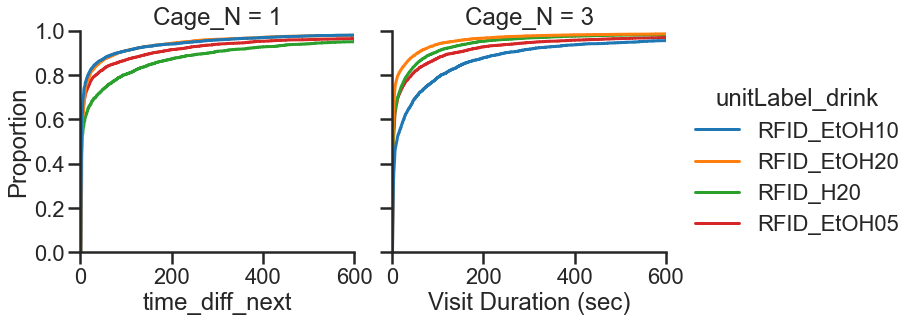

In [24]:
data_int = data_RFID_final[data_RFID_final['time_diff_next'] < 600]
sns.displot(data=data_RFID_final, x="time_diff_next", hue="unitLabel_drink", kind="ecdf", col='Cage_N')
plt.xlabel('Visit Duration (sec)')
plt.xlim(0, 600)
plt.show()

<Figure size 720x360 with 0 Axes>

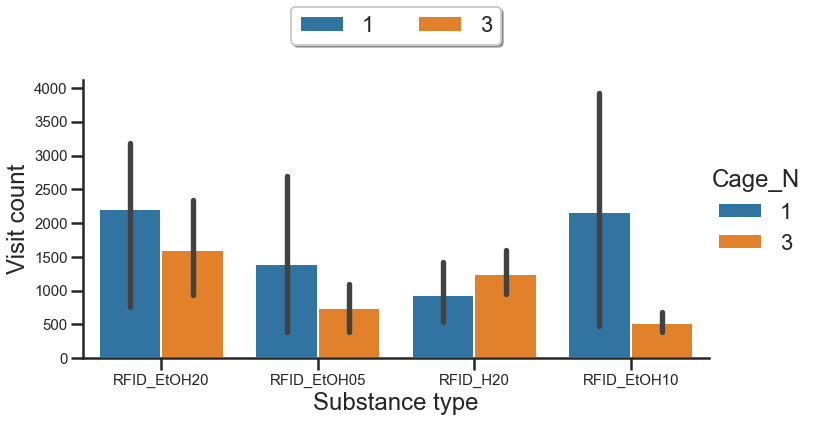

In [25]:
data_int = data_RFID_final.groupby(['IdRFID', 'Cage_N', 'Cage'])['unitLabel_drink'].value_counts().reset_index(name='count')
plt.figure(figsize=(10,5))
params = {'axes.labelsize': 30,
          'axes.titlesize': 30}
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
sns.catplot(data=data_int, x="unitLabel_drink", y='count', hue="Cage_N", kind='bar', height=5, aspect=2)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=5, fancybox=True, shadow=True)
plt.xlabel('Substance type')
plt.ylabel('Visit count')
plt.show()

In [ ]:
data_ul1 = data_RFID_final[data_RFID_final['unitLabel_drink'] == 'RFID_EtOH20']
data_ul12 = data_ul1[data_ul1['RFID_day_count'] == 13]
#data_ul12 = data_ul1
colorCodes = ['C{}'.format(i) for i in range(3)]

param = 'RFID_sec_count'

data_1 = data_ul12[data_ul12['IdRFID'] == '041A5553B4'][param].values
data_2 = data_ul12[data_ul12['IdRFID'] == '041A555D92'][param].values
data_3 = data_ul12[data_ul12['IdRFID'] == '041A555C29'][param].values


data_array = np.array([data_1, data_2, data_3,])

# Draw a spike raster plot
plt.figure(figsize=(70,20))
params = {'axes.labelsize': 75,
          'axes.titlesize': 75}
plt.rc('xtick', labelsize=60) 
plt.rc('ytick', labelsize=60) 
plt.rcParams.update(params)
plt.yticks([0,1,2,], 
           ['041A5553B4', '041A555D92', '041A555C29', 
            ])
plt.eventplot(data_array, color=colorCodes, linelengths = 0.3) 
plt.xlabel('Time (running second count)')
plt.ylabel('Task')


plt.show()

In [ ]:
data_ul1 = data_RFID_final[data_RFID_final['unitLabel_drink'] == 'RFID_H20']
#data_ul12 = data_ul1[data_ul1['ld'] == 'light_day3']
data_ul12 = data_ul1
colorCodes = ['C{}'.format(i) for i in range(10)]

param = 'RFID_sec_count'

data_1 = data_ul12[data_ul12['IdRFID'] == '041A55543F'][param].values
data_2 = data_ul12[data_ul12['IdRFID'] == '041A555EFB'][param].values
data_3 = data_ul12[data_ul12['IdRFID'] == '041A556020'][param].values
data_4 = data_ul12[data_ul12['IdRFID'] == '041A555BF5'][param].values
data_5 = data_ul12[data_ul12['IdRFID'] == '041A555A69'][param].values
data_6 = data_ul12[data_ul12['IdRFID'] == '041A555BA0'][param].values
data_7 = data_ul12[data_ul12['IdRFID'] == '041A555302'][param].values
data_8 = data_ul12[data_ul12['IdRFID'] == '041A55565D'][param].values
data_9 = data_ul12[data_ul12['IdRFID'] == '041A555452'][param].values
data_10 = data_ul12[data_ul12['IdRFID'] == '041A5552FB'][param].values

data_array = np.array([data_1, data_2, data_3, data_4, data_5,
                      data_6, data_7, data_8, data_9, data_10,
                      ])

# Draw a spike raster plot
plt.figure(figsize=(70,20))
params = {'axes.labelsize': 75,
          'axes.titlesize': 75}
plt.rc('xtick', labelsize=60) 
plt.rc('ytick', labelsize=60) 
plt.rcParams.update(params)
plt.yticks([0,1,2,3,4,5,6,7,8,9,], 
           ['b1', 'b2', 'b3', 'b4', 'b5', 
            's1', 's2', 's3', 's4', 's5', 
            ])
plt.eventplot(data_array, color=colorCodes, linelengths = 0.3) 
plt.xlabel('Time (running second count)')
plt.ylabel('Task')


plt.show()

### VDM data

#### Make and clean df

In [26]:
#create list of dir paths
VDM_path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID/build_3.0/VDM'
    
VDM_file_names = os.listdir(VDM_path)

VDM_data_dir_paths = []

for file in VDM_file_names:
    int_path = VDM_path + '/' + file
    VDM_data_dir_paths.append(int_path)
    
VDM_data_dir_paths

['/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID/build_3.0/VDM/p.05.10.20_mfc2_210823.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID/build_3.0/VDM/p.20.10.05_mfc2_210817.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID/build_3.0/VDM/p.05.10.20_mc3_210831.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID/build_3.0/VDM/p.05.10.20_mc3_210826.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID/build_3.0/VDM/c.o.br.g_mfc2_210811.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID/build_3.0/VDM/g.go.o.w_mfc2_210813.csv']

In [28]:
data_VDM = pd.DataFrame()

for path in VDM_data_dir_paths[2:4]:
    print(path)
    
    if path.split('/')[-1] == '.DS_Store':
        continue
        
    #create data table
    data_VDM_int = pd.read_table(path, sep=';')
    data_VDM_int = pd.DataFrame(data = data_VDM_int)
    data_VDM_int = data_VDM_int.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])['Columbus Instruments Device Interface Version 1.5'].str.split(',', expand=True)
    data_VDM_int.columns = data_VDM_int.loc[18].values
    data_VDM_int = data_VDM_int.drop([18])
    
    data_VDM_int['Cohort'] = path.split('/')[-1].split('_')[1]
    data_VDM_int['TP'] = path.split('/')[-1].split('_')[0]
    data_VDM_int['StartDate'] = path.split('/')[-1].split('_')[2]

    if data_VDM.empty:
        data_VDM = data_VDM_int
    else:
        data_VDM = pd.concat([data_VDM, data_VDM_int], axis=0)
    
    print(data_VDM_int.shape,'\n')
    print(data_VDM.shape,'\n')

print(data_VDM.shape)
data_VDM.head()

/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID/build_3.0/VDM/p.05.10.20_mc3_210831.csv
(380137, 15) 

(380137, 15) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID/build_3.0/VDM/p.05.10.20_mc3_210826.csv
(1095257, 15) 

(1475394, 15) 

(1475394, 15)


,Int,Cage,Time,Drinking (ml),Drinking Accum (ml),Drinking (ml),Drinking Accum (ml),Drinking (ml),Drinking Accum (ml),Drinking (ml),Drinking Accum (ml),,Cohort,TP,StartDate
19,0,1,08/31/21 14:48:42,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,,mc3,p.05.10.20,210831.csv
20,0,2,08/31/21 14:48:42,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,,mc3,p.05.10.20,210831.csv
21,0,3,08/31/21 14:48:42,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,,mc3,p.05.10.20,210831.csv
22,0,4,08/31/21 14:48:42,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,,mc3,p.05.10.20,210831.csv
23,1,1,08/31/21 14:48:43,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,,mc3,p.05.10.20,210831.csv


#### Clean up column names

In [29]:
data_VDM.columns = ['Int', 'Cage_VDM', 'VDM_Time', 
                    'VDM_H20', 'H20_accum',
                    'VDM_EtOH05', 'EtOH05_accum', 
                    'VDM_EtOH10', 'EtOH10_accum', 
                    'VDM_EtOH20', 'EtOH20_accum', '',
                    'Cohort', 'TP', 'StartDate']

data_VDM = data_VDM[['Cage_VDM', 'Cohort', 'TP', 'StartDate', 'VDM_Time', 'VDM_EtOH05', 'VDM_EtOH10', 'VDM_EtOH20', 'VDM_H20']]

data_VDM.tail()

,Cage_VDM,Cohort,TP,StartDate,VDM_Time,VDM_EtOH05,VDM_EtOH10,VDM_EtOH20,VDM_H20
1095271,4,mc3,p.05.10.20,210826.csv,08/31/21 13:07:03,0.000,0.000,0.000,0.000
1095272,1,mc3,p.05.10.20,210826.csv,08/31/21 13:07:04,0.000,0.000,0.000,0.000
1095273,2,mc3,p.05.10.20,210826.csv,08/31/21 13:07:04,0.000,0.000,0.000,0.000
1095274,3,mc3,p.05.10.20,210826.csv,08/31/21 13:07:04,0.000,0.000,0.000,0.000
1095275,4,mc3,p.05.10.20,210826.csv,08/31/21 13:07:04,0.000,0.000,0.000,0.000


#### Convert liquid vol to etoh vol

In [30]:
data_VDM['VDM_EtOH10'] = data_VDM['VDM_EtOH10'].astype('float')
data_VDM['VDM_EtOH20'] = data_VDM['VDM_EtOH20'].astype('float')
data_VDM['VDM_EtOH05'] = data_VDM['VDM_EtOH05'].astype('float')
data_VDM['VDM_H20'] = data_VDM['VDM_H20'].astype('float')

#### Make into tidy df

In [31]:
#melt dataframe (new column of parameters)

meta_params = ['Cage_VDM', 'Cohort', 'TP', 'StartDate', 'VDM_Time']
intake_params = ['VDM_EtOH05', 'VDM_EtOH10', 'VDM_EtOH20', 'VDM_H20']

data_VDM_tidy = pd.melt(data_VDM, id_vars=meta_params, value_vars=intake_params)

print(data_VDM_tidy.shape)
data_VDM_tidy.head()

(5901576, 7)


,Cage_VDM,Cohort,TP,StartDate,VDM_Time,variable,value
0,1,mc3,p.05.10.20,210831.csv,08/31/21 14:48:42,VDM_EtOH05,0.0
1,2,mc3,p.05.10.20,210831.csv,08/31/21 14:48:42,VDM_EtOH05,0.0
2,3,mc3,p.05.10.20,210831.csv,08/31/21 14:48:42,VDM_EtOH05,0.0
3,4,mc3,p.05.10.20,210831.csv,08/31/21 14:48:42,VDM_EtOH05,0.0
4,1,mc3,p.05.10.20,210831.csv,08/31/21 14:48:43,VDM_EtOH05,0.0


#### Drop times with no intake data

In [32]:
data_VDM_tidy_intake = data_VDM_tidy[data_VDM_tidy['value'] > 0]
print(data_VDM_tidy_intake.shape)
data_VDM_tidy_intake.head()

(2151, 7)


,Cage_VDM,Cohort,TP,StartDate,VDM_Time,variable,value
23586,1,mc3,p.05.10.20,210831.csv,08/31/21 17:25:40,VDM_EtOH05,0.025
40658,1,mc3,p.05.10.20,210831.csv,08/31/21 19:18:54,VDM_EtOH05,0.025
40726,1,mc3,p.05.10.20,210831.csv,08/31/21 19:19:21,VDM_EtOH05,0.025
40866,1,mc3,p.05.10.20,210831.csv,08/31/21 19:20:17,VDM_EtOH05,0.025
44674,1,mc3,p.05.10.20,210831.csv,08/31/21 19:45:33,VDM_EtOH05,0.025


#### Clean up datetime

In [33]:
#clean up and create datetime columns
data_VDM_tidy_intake['VDM_datetime'] = pd.to_datetime(data_VDM_tidy_intake['VDM_Time'])
data_VDM_tidy_intake['VDM_timestamp'] = [x.timestamp() for x in data_VDM_tidy_intake['VDM_datetime']]

data_VDM_tidy_intake['VDM_date'] = data_VDM_tidy_intake['VDM_datetime'].dt.date
data_VDM_tidy_intake['VDM_day'] = data_VDM_tidy_intake['VDM_datetime'].dt.day
data_VDM_tidy_intake['VDM_time'] = data_VDM_tidy_intake['VDM_datetime'].dt.strftime("%H:%M:%S")
data_VDM_tidy_intake['VDM_hour'] = data_VDM_tidy_intake['VDM_datetime'].dt.hour
data_VDM_tidy_intake['VDM_min'] = data_VDM_tidy_intake['VDM_datetime'].dt.minute
data_VDM_tidy_intake['VDM_second'] = data_VDM_tidy_intake['VDM_datetime'].dt.second

print(data_VDM_tidy_intake.shape)
data_VDM_tidy_intake.head()

(2151, 15)


,Cage_VDM,Cohort,TP,StartDate,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second
23586,1,mc3,p.05.10.20,210831.csv,08/31/21 17:25:40,VDM_EtOH05,0.025,2021-08-31 17:25:40,1.630431e+09,2021-08-31,31,17:25:40,17,25,40
40658,1,mc3,p.05.10.20,210831.csv,08/31/21 19:18:54,VDM_EtOH05,0.025,2021-08-31 19:18:54,1.630438e+09,2021-08-31,31,19:18:54,19,18,54
40726,1,mc3,p.05.10.20,210831.csv,08/31/21 19:19:21,VDM_EtOH05,0.025,2021-08-31 19:19:21,1.630438e+09,2021-08-31,31,19:19:21,19,19,21
40866,1,mc3,p.05.10.20,210831.csv,08/31/21 19:20:17,VDM_EtOH05,0.025,2021-08-31 19:20:17,1.630438e+09,2021-08-31,31,19:20:17,19,20,17
44674,1,mc3,p.05.10.20,210831.csv,08/31/21 19:45:33,VDM_EtOH05,0.025,2021-08-31 19:45:33,1.630439e+09,2021-08-31,31,19:45:33,19,45,33


#### Add light dark and clean

In [34]:
def assign_ld(time):
    if (time >= 6) & (time < 18):
        return 'light'
    if (time >= 0) & (time < 6):
        return 'dark_am'
    if (time >= 18):
        return 'dark_pm'
    
data_VDM_tidy_intake['ld_seg'] = data_VDM_tidy_intake['VDM_hour'].apply(assign_ld)

data_VDM_tidy_intake.head()

,Cage_VDM,Cohort,TP,StartDate,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg
23586,1,mc3,p.05.10.20,210831.csv,08/31/21 17:25:40,VDM_EtOH05,0.025,2021-08-31 17:25:40,1.630431e+09,2021-08-31,31,17:25:40,17,25,40,light
40658,1,mc3,p.05.10.20,210831.csv,08/31/21 19:18:54,VDM_EtOH05,0.025,2021-08-31 19:18:54,1.630438e+09,2021-08-31,31,19:18:54,19,18,54,dark_pm
40726,1,mc3,p.05.10.20,210831.csv,08/31/21 19:19:21,VDM_EtOH05,0.025,2021-08-31 19:19:21,1.630438e+09,2021-08-31,31,19:19:21,19,19,21,dark_pm
40866,1,mc3,p.05.10.20,210831.csv,08/31/21 19:20:17,VDM_EtOH05,0.025,2021-08-31 19:20:17,1.630438e+09,2021-08-31,31,19:20:17,19,20,17,dark_pm
44674,1,mc3,p.05.10.20,210831.csv,08/31/21 19:45:33,VDM_EtOH05,0.025,2021-08-31 19:45:33,1.630439e+09,2021-08-31,31,19:45:33,19,45,33,dark_pm


### Filter RFID data by VDM times

In [35]:
data_VDM_tidy_intake = data_VDM_tidy_intake.sort_values(['variable', 'VDM_datetime']).reset_index(drop=True)
data_VDM_tidy_intake.head()

,Cage_VDM,Cohort,TP,StartDate,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg
0,1,mc3,p.05.10.20,210826.csv,08/26/21 20:05:01,VDM_EtOH05,0.025,2021-08-26 20:05:01,1.630008e+09,2021-08-26,26,20:05:01,20,5,1,dark_pm
1,1,mc3,p.05.10.20,210826.csv,08/26/21 22:26:15,VDM_EtOH05,0.025,2021-08-26 22:26:15,1.630017e+09,2021-08-26,26,22:26:15,22,26,15,dark_pm
2,1,mc3,p.05.10.20,210826.csv,08/26/21 22:26:20,VDM_EtOH05,0.025,2021-08-26 22:26:20,1.630017e+09,2021-08-26,26,22:26:20,22,26,20,dark_pm
3,1,mc3,p.05.10.20,210826.csv,08/26/21 22:26:38,VDM_EtOH05,0.025,2021-08-26 22:26:38,1.630017e+09,2021-08-26,26,22:26:38,22,26,38,dark_pm
4,1,mc3,p.05.10.20,210826.csv,08/26/21 22:26:52,VDM_EtOH05,0.025,2021-08-26 22:26:52,1.630017e+09,2021-08-26,26,22:26:52,22,26,52,dark_pm


In [36]:
data_RFID_final= data_RFID_final.sort_values(['unitLabel_drink', 'RFID_datetime_start']).reset_index(drop=True)
data_RFID_final.head()

,Round,Round_info,Sub_round,Timepoint,Cage_N,Cage,Animal,Injury,Sex,IdRFID,weight_pre,weight_post,weight_diff,notes,file,unitLabel,unitLabel_drink,eventDuration,RFID_datetime_start,RFID_datetime_end,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,time_diff_next_round,RFID_time_start,RFID_time_end,RFID_date,RFID_day,ld,ld_seg,RFID_day_count,RFID_hour,RFID_min,RFID_second,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running
0,1,intruders,2,NaN,3,1,NaN,NaN,m,041A5554CE,27.8,NaN,NaN,NaN,Idspyder-21.08.26.csv,AM1-6,RFID_EtOH05,2.503,2021-08-26 11:56:36.705033600,2021-08-26 11:56:39.208033600,2021-08-26 11:57:02.421993600,041A555AB5,diff,23.213960,20.0,11:56:36,11:56:39,2021-08-26,26,light_day1,light,1,11,56,36,716,42996,11,716,42936
1,1,intruders,2,NaN,3,1,NaN,NaN,m,041A555AB5,27.6,NaN,NaN,NaN,Idspyder-21.08.26.csv,AM1-6,RFID_EtOH05,0.075,2021-08-26 11:57:02.421993600,2021-08-26 11:57:02.496993600,2021-08-26 11:57:03.435984000,041A555AB5,same,0.938990,0.0,11:57:02,11:57:02,2021-08-26,26,light_day1,light,1,11,57,2,717,43022,11,717,42962
2,1,intruders,2,NaN,3,1,NaN,NaN,m,041A555AB5,27.6,NaN,NaN,NaN,Idspyder-21.08.26.csv,AM1-6,RFID_EtOH05,0.729,2021-08-26 11:57:03.435984000,2021-08-26 11:57:04.164984000,2021-08-26 11:57:35.779046400,041A555C9D,diff,31.614062,30.0,11:57:03,11:57:04,2021-08-26,26,light_day1,light,1,11,57,3,717,43023,11,717,42963
3,1,intruders,2,NaN,3,1,NaN,NaN,m,041A555C9D,29.9,NaN,NaN,NaN,Idspyder-21.08.26.csv,AM1-6,RFID_EtOH05,1.800,2021-08-26 11:57:35.779046400,2021-08-26 11:57:37.579046400,2021-08-31 15:05:00.762028800,041A555DD1,diff,443243.182982,443240.0,11:57:35,11:57:37,2021-08-26,26,light_day1,light,1,11,57,35,717,43055,11,717,42995
4,1,intruders,2,NaN,3,1,NaN,NaN,m,041A555C9D,29.9,NaN,NaN,NaN,Idspyder-21.08.26.csv,AM1-2,RFID_EtOH05,0.113,2021-08-26 11:58:08.291020800,2021-08-26 11:58:08.404020800,2021-08-26 12:07:44.607014400,041A5554CE,diff,576.202993,580.0,11:58:08,11:58:08,2021-08-26,26,light_day1,light,1,11,58,8,718,43088,11,718,43028


In [45]:
data_comb = data_VDM_tidy_intake
RFID_data = data_RFID_final

VDM_RFID_mapping = {'VDM_EtOH10': 'RFID_EtOH10',
                    'VDM_EtOH05': 'RFID_EtOH05',
                    'VDM_EtOH20': 'RFID_EtOH20',
                    'VDM_H20': 'RFID_H20'}

RFID_eventDuration = []
RFID_assign_id_pre = []
RFID_assign_var_pre = []
RFID_datetime_start_pre = []
RFID_datetime_end_pre = []
RFID_datetime_start_next = []
IdRFID_next = []
IdRFID_diff_next = []
time_diff_next = []
ld = []
RFID_day_count = []

for index, row in data_comb.iterrows():
    if index%1000 == 0:
        print(index)
        
    #find RFID signal start time closest to VDM time before
    try:
        int_assign = RFID_data[(RFID_data['Cage'] == int(row['Cage_VDM'])) & #match cage
                               (RFID_data['unitLabel_drink'] == VDM_RFID_mapping[row['variable']]) & #match tube
                               (RFID_data['RFID_datetime_start'] <= row['VDM_datetime']) #find closest datetime
                              ].sort_values(['RFID_datetime_start']).iloc[-1]

        RFID_eventDuration.append(int_assign['eventDuration'])
        RFID_assign_id_pre.append(int_assign['IdRFID'])
        RFID_assign_var_pre.append(int_assign['unitLabel'])
        RFID_datetime_start_pre.append(int_assign['RFID_datetime_start'])
        RFID_datetime_end_pre.append(int_assign['RFID_datetime_end'])
        RFID_datetime_start_next.append(int_assign['RFID_datetime_start_next'])
        IdRFID_next.append(int_assign['IdRFID_next'])
        IdRFID_diff_next.append(int_assign['IdRFID_diff_next'])
        time_diff_next.append(int_assign['time_diff_next'])
        ld.append(int_assign['ld'])
        RFID_day_count.append(int_assign['RFID_day_count'])
        
    except:
        print(index, 'pre')
        RFID_eventDuration.append(np.nan)
        RFID_assign_id_pre.append(np.nan)
        RFID_assign_var_pre.append(np.nan)
        RFID_datetime_start_pre.append(np.nan)
        RFID_datetime_end_pre.append(np.nan)
        RFID_datetime_start_next.append(np.nan)
        IdRFID_next.append(np.nan)
        IdRFID_diff_next.append(np.nan)
        time_diff_next.append(np.nan)
        ld.append(np.nan)
        RFID_day_count.append(np.nan)
        
data_comb['RFID_eventDuration'] = RFID_eventDuration
data_comb['RFID_assign_id_pre'] = RFID_assign_id_pre
data_comb['RFID_assign_var_pre'] = RFID_assign_var_pre
data_comb['RFID_datetime_start_pre'] = RFID_datetime_start_pre
data_comb['RFID_datetime_end_pre'] = RFID_datetime_end_pre
data_comb['RFID_datetime_start_next'] = RFID_datetime_start_next
data_comb['IdRFID_next'] = IdRFID_next
data_comb['IdRFID_diff_next'] = IdRFID_diff_next
data_comb['time_diff_next'] = time_diff_next
data_comb['ld'] = ld
data_comb['day_count'] = RFID_day_count

print(data_comb.shape)
data_comb.head()

0
23 pre
26 pre
28 pre
29 pre
31 pre
33 pre
35 pre
36 pre
37 pre
40 pre
42 pre
44 pre
47 pre
49 pre
50 pre
51 pre
54 pre
55 pre
56 pre
59 pre
60 pre
62 pre
63 pre
145 pre
147 pre
148 pre
149 pre
151 pre
152 pre
162 pre
163 pre
164 pre
166 pre
168 pre
170 pre
174 pre
176 pre
177 pre
181 pre
186 pre
189 pre
190 pre
192 pre
194 pre
195 pre
197 pre
199 pre
200 pre
202 pre
203 pre
205 pre
206 pre
208 pre
209 pre
211 pre
394 pre
403 pre
404 pre
405 pre
415 pre
425 pre
428 pre
430 pre
480 pre
485 pre
498 pre
499 pre
502 pre
503 pre
510 pre
512 pre
513 pre
517 pre
518 pre
520 pre
523 pre
524 pre
526 pre
528 pre
530 pre
532 pre
533 pre
535 pre
537 pre
538 pre
540 pre
766 pre
778 pre
788 pre
846 pre
875 pre
885 pre
886 pre
895 pre
917 pre
949 pre
950 pre
970 pre
1000
1038 pre
1047 pre
1071 pre
1105 pre
1151 pre
1152 pre
1156 pre
1255 pre
1263 pre
1271 pre
1312 pre
1405 pre
1411 pre
1472 pre
1473 pre
1509 pre
1511 pre
1512 pre
1546 pre
1644 pre
1669 pre
1742 pre
1751 pre
2000
(2151, 29)


,Cage_VDM,Cohort,TP,StartDate,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,ld,VDM_RFID_timediff,RFID_day_count,day_count
0,1,mc3,p.05.10.20,210826.csv,08/26/21 20:05:01,VDM_EtOH05,0.025,2021-08-26 20:05:01,1.630008e+09,2021-08-26,26,20:05:01,20,5,1,dark_pm,0.075,041A555AB5,AM1-2,2021-08-26 20:03:01.000022400,2021-08-26 20:03:01.075022400,2021-08-26 20:07:16.986028800,041A555C9D,diff,255.911006,dark_night1,119.924977,1.0,1.0
1,1,mc3,p.05.10.20,210826.csv,08/26/21 22:26:15,VDM_EtOH05,0.025,2021-08-26 22:26:15,1.630017e+09,2021-08-26,26,22:26:15,22,26,15,dark_pm,0.075,041A555C9D,AM1-2,2021-08-26 22:26:13.452979200,2021-08-26 22:26:13.527979200,2021-08-26 22:26:15.166982400,041A555C9D,same,1.639003,dark_night1,1.472020,1.0,1.0
2,1,mc3,p.05.10.20,210826.csv,08/26/21 22:26:20,VDM_EtOH05,0.025,2021-08-26 22:26:20,1.630017e+09,2021-08-26,26,22:26:20,22,26,20,dark_pm,14.350,041A555C9D,AM1-2,2021-08-26 22:26:15.166982400,2021-08-26 22:26:29.516982400,2021-08-26 22:26:31.331990400,041A555C9D,same,1.815008,dark_night1,0.000000,1.0,1.0
3,1,mc3,p.05.10.20,210826.csv,08/26/21 22:26:38,VDM_EtOH05,0.025,2021-08-26 22:26:38,1.630017e+09,2021-08-26,26,22:26:38,22,26,38,dark_pm,0.114,041A5554CE,AM1-2,2021-08-26 22:26:37.790044800,2021-08-26 22:26:37.904044800,2021-08-26 22:26:38.818982400,041A555C9D,diff,0.914937,dark_night1,0.095955,1.0,1.0
4,1,mc3,p.05.10.20,210826.csv,08/26/21 22:26:52,VDM_EtOH05,0.025,2021-08-26 22:26:52,1.630017e+09,2021-08-26,26,22:26:52,22,26,52,dark_pm,57.553,041A555C9D,AM1-2,2021-08-26 22:26:38.818982400,2021-08-26 22:27:36.371982400,2021-08-26 22:27:38.687011200,041A555C9D,same,2.315028,dark_night1,0.000000,1.0,1.0


In [46]:
def time_within(RFID_start, RFID_stop, VDM_time):
    
    if (VDM_time >= RFID_start) & (VDM_time <= RFID_stop):
        return 0
    
    elif (VDM_time >= RFID_start) & (VDM_time >= RFID_stop):
        time_within = VDM_time - RFID_stop
        time_within = time_within.total_seconds()
        return time_within
    
data_comb['VDM_RFID_timediff'] = data_comb.apply(lambda row: time_within(row['RFID_datetime_start_pre'], 
                                                                   row['RFID_datetime_end_pre'],
                                                                   row['VDM_datetime']), axis=1)

data_comb.head()

,Cage_VDM,Cohort,TP,StartDate,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,ld,VDM_RFID_timediff,RFID_day_count,day_count
0,1,mc3,p.05.10.20,210826.csv,08/26/21 20:05:01,VDM_EtOH05,0.025,2021-08-26 20:05:01,1.630008e+09,2021-08-26,26,20:05:01,20,5,1,dark_pm,0.075,041A555AB5,AM1-2,2021-08-26 20:03:01.000022400,2021-08-26 20:03:01.075022400,2021-08-26 20:07:16.986028800,041A555C9D,diff,255.911006,dark_night1,119.924977,1.0,1.0
1,1,mc3,p.05.10.20,210826.csv,08/26/21 22:26:15,VDM_EtOH05,0.025,2021-08-26 22:26:15,1.630017e+09,2021-08-26,26,22:26:15,22,26,15,dark_pm,0.075,041A555C9D,AM1-2,2021-08-26 22:26:13.452979200,2021-08-26 22:26:13.527979200,2021-08-26 22:26:15.166982400,041A555C9D,same,1.639003,dark_night1,1.472020,1.0,1.0
2,1,mc3,p.05.10.20,210826.csv,08/26/21 22:26:20,VDM_EtOH05,0.025,2021-08-26 22:26:20,1.630017e+09,2021-08-26,26,22:26:20,22,26,20,dark_pm,14.350,041A555C9D,AM1-2,2021-08-26 22:26:15.166982400,2021-08-26 22:26:29.516982400,2021-08-26 22:26:31.331990400,041A555C9D,same,1.815008,dark_night1,0.000000,1.0,1.0
3,1,mc3,p.05.10.20,210826.csv,08/26/21 22:26:38,VDM_EtOH05,0.025,2021-08-26 22:26:38,1.630017e+09,2021-08-26,26,22:26:38,22,26,38,dark_pm,0.114,041A5554CE,AM1-2,2021-08-26 22:26:37.790044800,2021-08-26 22:26:37.904044800,2021-08-26 22:26:38.818982400,041A555C9D,diff,0.914937,dark_night1,0.095955,1.0,1.0
4,1,mc3,p.05.10.20,210826.csv,08/26/21 22:26:52,VDM_EtOH05,0.025,2021-08-26 22:26:52,1.630017e+09,2021-08-26,26,22:26:52,22,26,52,dark_pm,57.553,041A555C9D,AM1-2,2021-08-26 22:26:38.818982400,2021-08-26 22:27:36.371982400,2021-08-26 22:27:38.687011200,041A555C9D,same,2.315028,dark_night1,0.000000,1.0,1.0


#### Add metadata

In [47]:
data_comb = meta_data.merge(data_comb.reset_index(), left_on='IdRFID', right_on='RFID_assign_id_pre', sort=False)

print(data_comb.shape)
data_comb.head()

(2030, 47)


,Round,Round_info,Sub_round,Timepoint,Cage_N,Cage,Animal,Injury,Sex,IdRFID,weight_pre,weight_post,weight_diff,notes,wes_day,wd_day,r_day,index,Cage_VDM,Cohort,TP,StartDate,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,ld,VDM_RFID_timediff,RFID_day_count,day_count
0,1,intruders,2,NaN,3,1,NaN,NaN,m,041A5554CE,27.8,NaN,NaN,NaN,NaN,NaN,NaN,3,1,mc3,p.05.10.20,210826.csv,08/26/21 22:26:38,VDM_EtOH05,0.025,2021-08-26 22:26:38,1.630017e+09,2021-08-26,26,22:26:38,22,26,38,dark_pm,0.114,041A5554CE,AM1-2,2021-08-26 22:26:37.790044800,2021-08-26 22:26:37.904044800,2021-08-26 22:26:38.818982400,041A555C9D,diff,0.914937,dark_night1,0.095955,1.0,1.0
1,1,intruders,2,NaN,3,1,NaN,NaN,m,041A5554CE,27.8,NaN,NaN,NaN,NaN,NaN,NaN,8,1,mc3,p.05.10.20,210826.csv,08/26/21 22:34:53,VDM_EtOH05,0.025,2021-08-26 22:34:53,1.630017e+09,2021-08-26,26,22:34:53,22,34,53,dark_pm,6.279,041A5554CE,AM1-2,2021-08-26 22:34:50.995977600,2021-08-26 22:34:57.274977600,2021-08-26 22:35:00.588969600,041A5554CE,same,3.313992,dark_night1,0.000000,1.0,1.0
2,1,intruders,2,NaN,3,1,NaN,NaN,m,041A5554CE,27.8,NaN,NaN,NaN,NaN,NaN,NaN,9,1,mc3,p.05.10.20,210826.csv,08/26/21 22:34:56,VDM_EtOH05,0.025,2021-08-26 22:34:56,1.630017e+09,2021-08-26,26,22:34:56,22,34,56,dark_pm,6.279,041A5554CE,AM1-2,2021-08-26 22:34:50.995977600,2021-08-26 22:34:57.274977600,2021-08-26 22:35:00.588969600,041A5554CE,same,3.313992,dark_night1,0.000000,1.0,1.0
3,1,intruders,2,NaN,3,1,NaN,NaN,m,041A5554CE,27.8,NaN,NaN,NaN,NaN,NaN,NaN,30,1,mc3,p.05.10.20,210826.csv,08/27/21 18:45:36,VDM_EtOH05,0.025,2021-08-27 18:45:36,1.630090e+09,2021-08-27,27,18:45:36,18,45,36,dark_pm,0.228,041A5554CE,AM1-2,2021-08-27 18:34:59.756995200,2021-08-27 18:34:59.984995200,2021-08-27 18:59:29.168966400,041A555C9D,diff,1469.183971,dark_night2,636.015004,2.0,2.0
4,1,intruders,2,NaN,3,1,NaN,NaN,m,041A5554CE,27.8,NaN,NaN,NaN,NaN,NaN,NaN,38,1,mc3,p.05.10.20,210826.csv,08/28/21 16:28:26,VDM_EtOH05,0.025,2021-08-28 16:28:26,1.630168e+09,2021-08-28,28,16:28:26,16,28,26,light,0.075,041A5554CE,AM1-2,2021-08-28 14:31:54.184972800,2021-08-28 14:31:54.259972800,2021-08-28 16:52:18.525993600,041A555C9D,diff,8424.266020,light_day3,6991.740027,3.0,3.0


#### Add day, hour, and min counts

In [48]:
#column of running min and second count within each day
data_comb['min_count'] = (data_comb['VDM_hour']*60) + data_comb['VDM_min'] 
data_comb['sec_count'] = (data_comb['min_count']*60) + data_comb['VDM_second'] 

#column of running hour and minute count across all days
data_comb['hour_count_running'] = (data_comb['day_count']*24) + data_comb['VDM_hour'] - 24
data_comb['min_count_running'] = (data_comb['hour_count_running']*60) + data_comb['VDM_min'] 
data_comb['sec_count_running'] = (data_comb['min_count_running']*60) + data_comb['VDM_second'] - 60

print(data_comb.shape)
data_comb.head()

(2030, 52)


,Round,Round_info,Sub_round,Timepoint,Cage_N,Cage,Animal,Injury,Sex,IdRFID,weight_pre,weight_post,weight_diff,notes,wes_day,wd_day,r_day,index,Cage_VDM,Cohort,TP,StartDate,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,RFID_datetime_start_next,IdRFID_next,IdRFID_diff_next,time_diff_next,ld,VDM_RFID_timediff,RFID_day_count,day_count,min_count,sec_count,hour_count_running,min_count_running,sec_count_running
0,1,intruders,2,NaN,3,1,NaN,NaN,m,041A5554CE,27.8,NaN,NaN,NaN,NaN,NaN,NaN,3,1,mc3,p.05.10.20,210826.csv,08/26/21 22:26:38,VDM_EtOH05,0.025,2021-08-26 22:26:38,1.630017e+09,2021-08-26,26,22:26:38,22,26,38,dark_pm,0.114,041A5554CE,AM1-2,2021-08-26 22:26:37.790044800,2021-08-26 22:26:37.904044800,2021-08-26 22:26:38.818982400,041A555C9D,diff,0.914937,dark_night1,0.095955,1.0,1.0,1346,80798,22.0,1346.0,80738.0
1,1,intruders,2,NaN,3,1,NaN,NaN,m,041A5554CE,27.8,NaN,NaN,NaN,NaN,NaN,NaN,8,1,mc3,p.05.10.20,210826.csv,08/26/21 22:34:53,VDM_EtOH05,0.025,2021-08-26 22:34:53,1.630017e+09,2021-08-26,26,22:34:53,22,34,53,dark_pm,6.279,041A5554CE,AM1-2,2021-08-26 22:34:50.995977600,2021-08-26 22:34:57.274977600,2021-08-26 22:35:00.588969600,041A5554CE,same,3.313992,dark_night1,0.000000,1.0,1.0,1354,81293,22.0,1354.0,81233.0
2,1,intruders,2,NaN,3,1,NaN,NaN,m,041A5554CE,27.8,NaN,NaN,NaN,NaN,NaN,NaN,9,1,mc3,p.05.10.20,210826.csv,08/26/21 22:34:56,VDM_EtOH05,0.025,2021-08-26 22:34:56,1.630017e+09,2021-08-26,26,22:34:56,22,34,56,dark_pm,6.279,041A5554CE,AM1-2,2021-08-26 22:34:50.995977600,2021-08-26 22:34:57.274977600,2021-08-26 22:35:00.588969600,041A5554CE,same,3.313992,dark_night1,0.000000,1.0,1.0,1354,81296,22.0,1354.0,81236.0
3,1,intruders,2,NaN,3,1,NaN,NaN,m,041A5554CE,27.8,NaN,NaN,NaN,NaN,NaN,NaN,30,1,mc3,p.05.10.20,210826.csv,08/27/21 18:45:36,VDM_EtOH05,0.025,2021-08-27 18:45:36,1.630090e+09,2021-08-27,27,18:45:36,18,45,36,dark_pm,0.228,041A5554CE,AM1-2,2021-08-27 18:34:59.756995200,2021-08-27 18:34:59.984995200,2021-08-27 18:59:29.168966400,041A555C9D,diff,1469.183971,dark_night2,636.015004,2.0,2.0,1125,67536,42.0,2565.0,153876.0
4,1,intruders,2,NaN,3,1,NaN,NaN,m,041A5554CE,27.8,NaN,NaN,NaN,NaN,NaN,NaN,38,1,mc3,p.05.10.20,210826.csv,08/28/21 16:28:26,VDM_EtOH05,0.025,2021-08-28 16:28:26,1.630168e+09,2021-08-28,28,16:28:26,16,28,26,light,0.075,041A5554CE,AM1-2,2021-08-28 14:31:54.184972800,2021-08-28 14:31:54.259972800,2021-08-28 16:52:18.525993600,041A555C9D,diff,8424.266020,light_day3,6991.740027,3.0,3.0,988,59306,64.0,3868.0,232046.0


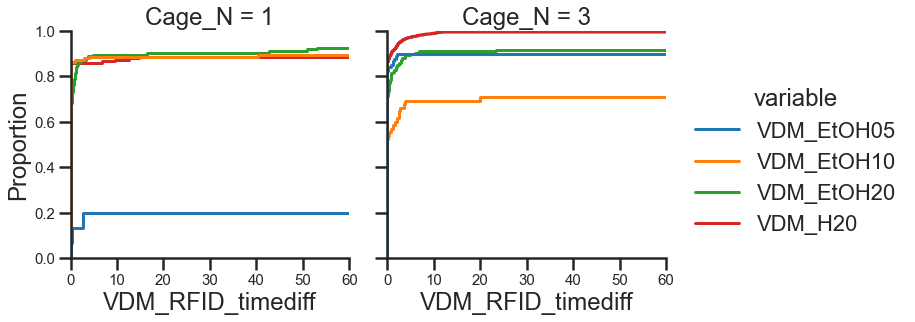

In [51]:
d=data_comb[data_comb['day_count']<6]
sns.displot(data=d, x="VDM_RFID_timediff", kind="ecdf", hue='variable', col='Cage_N')
plt.xlim(0, 60)

plt.show()

In [63]:
#remove any time diff greater than 1 sec
print(data_comb.shape)
data_comb_0 = data_comb[(data_comb['VDM_RFID_timediff']<5)]
print(data_comb_0.shape)

data_gbmean = data_comb_0.groupby(['Cage_N', 'IdRFID', 'day_count', 
                                   'variable', ])['value',].sum().reset_index()

data_gbmean.head()

(2030, 52)
(1871, 52)


,Cage_N,IdRFID,day_count,variable,value
0,1,041A555856,2.0,VDM_EtOH05,0.021
1,1,041A555856,2.0,VDM_EtOH10,1.407
2,1,041A555856,2.0,VDM_EtOH20,0.042
3,1,041A555856,3.0,VDM_EtOH05,0.021
4,1,041A555856,3.0,VDM_EtOH10,0.651


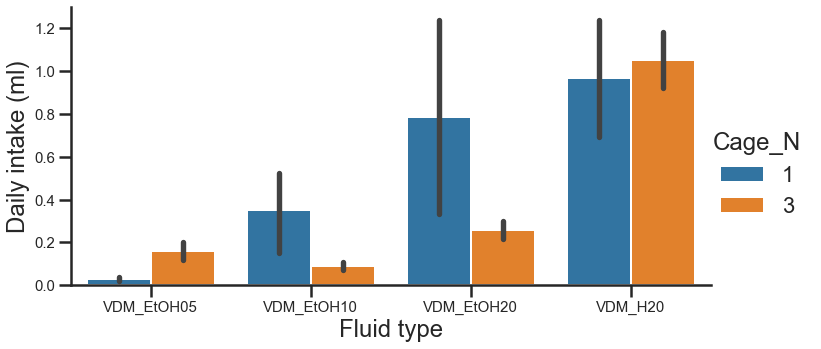

In [64]:

sns.catplot(x='variable', y='value', data=data_gbmean, kind='bar', hue='Cage_N', height=5, aspect=2, ci=68)
plt.xlabel('Fluid type')
plt.ylabel('Daily intake (ml)')
plt.show()

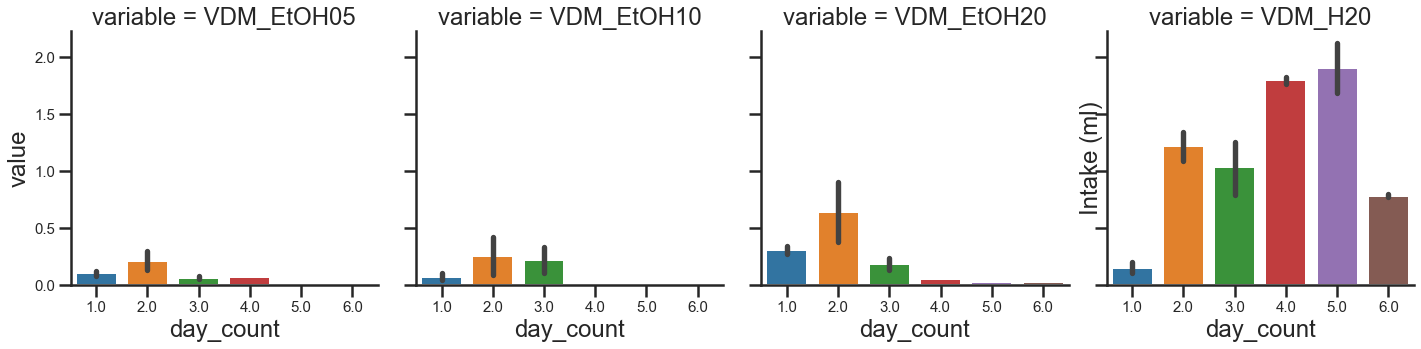

In [65]:
sns.catplot(x='day_count', y='value', data=data_gbmean,  kind='bar', 
            ci=68, height=5, aspect=1, col='variable')


plt.ylabel('Intake (ml)')

plt.show()

dark_night1


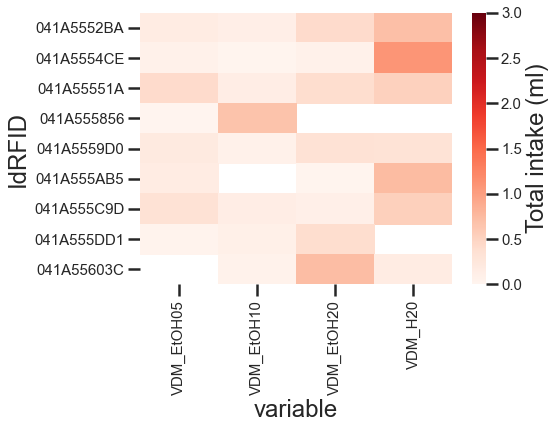

dark_night2


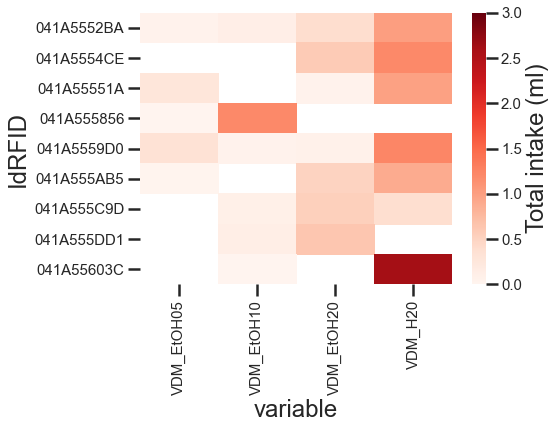

light_day3


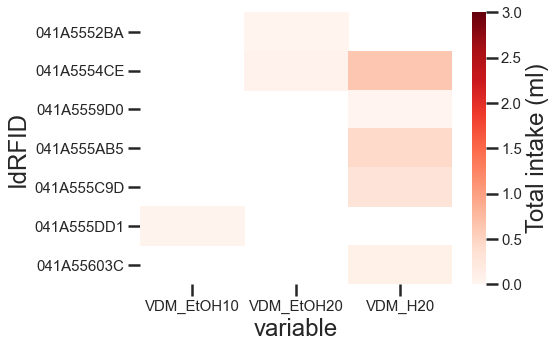

light_day2


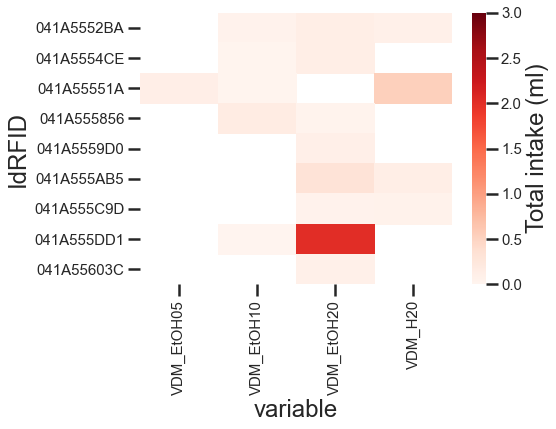

dark_night3


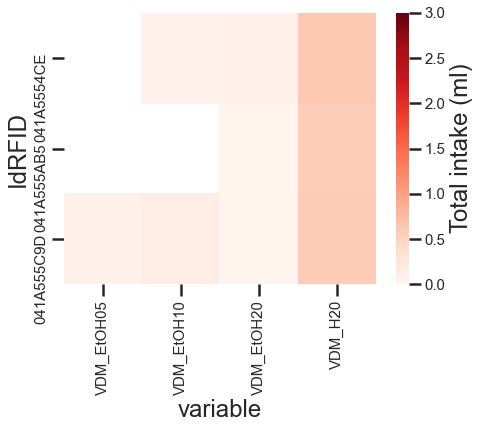

dark_night4


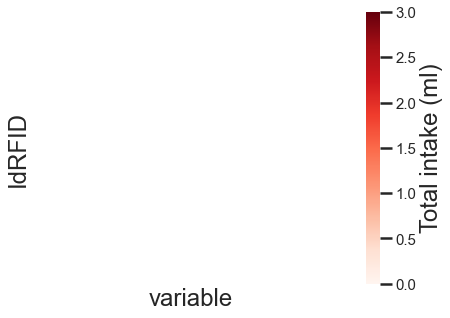

light_day5


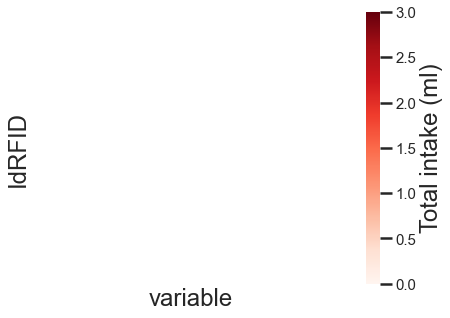

dark_night5


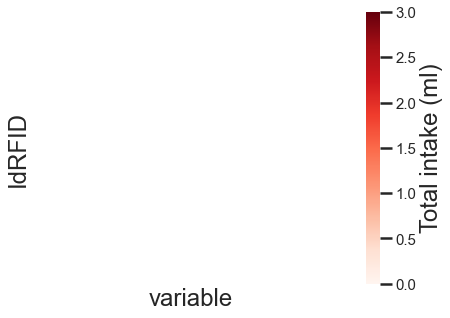

light_day1


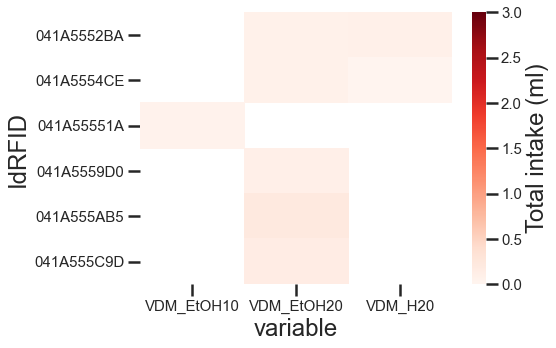

light_day6


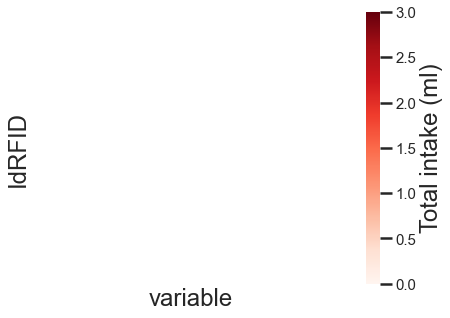

light_day4


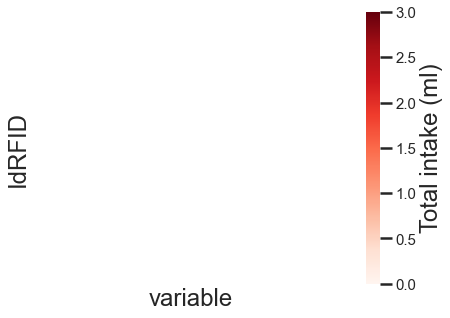

In [59]:

for variable in data_comb['ld'].unique():
    print(variable)
    #select variable
    data = data_int[(data_int['ld'] == variable)]
    
    #compute intake count by cage and hour
    groupby = data.groupby(['IdRFID', 'variable'])['value'].sum().reset_index()
    #viz
    groupby = groupby.pivot('IdRFID', 'variable', "value")
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(groupby, cmap="Reds", vmin=0, vmax=3, cbar_kws={'label': 'Total intake (ml)'})
    #plt.xlabel('Bottle')
    plt.show()

In [66]:
data_comb_0.groupby(['Cage'])['IdRFID'].unique()

Cage
1    [041A5554CE, 041A555AB5, 041A555C9D, 041A5559D0, 041A5552BA, 041A55551A]
2    [041A555DD1]                                                            
3    [041A55603C]                                                            
4    [041A555856]                                                            
Name: IdRFID, dtype: object

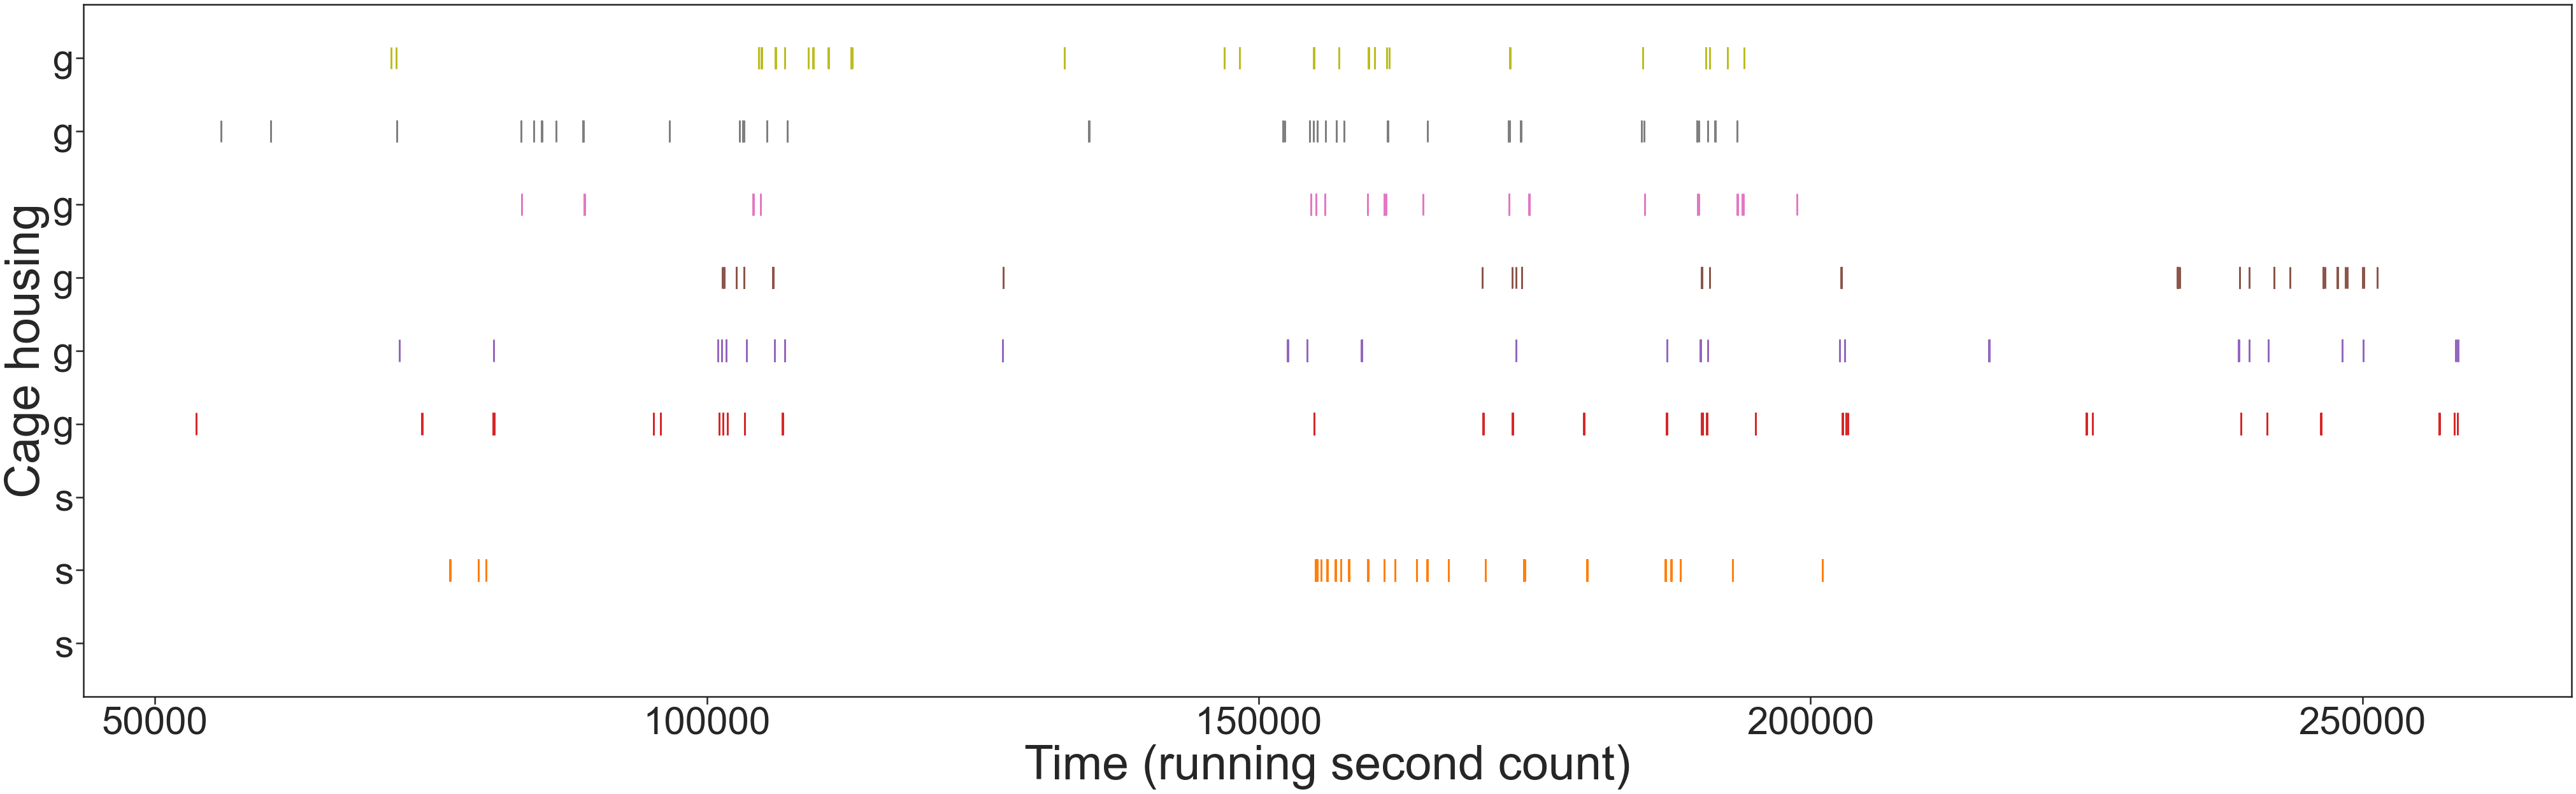

In [78]:
data_ul1 = data_comb_0[data_comb_0['variable'] == 'VDM_H20']
data_ul12 = data_ul1[data_ul1['day_count']<4]
#data_ul12 = data_ul1
colorCodes = ['C{}'.format(i) for i in range(9)]

param = 'sec_count_running'

data_1 = data_ul12[data_ul12['IdRFID'] == '041A555DD1'][param].values
data_2 = data_ul12[data_ul12['IdRFID'] == '041A55603C'][param].values
data_3 = data_ul12[data_ul12['IdRFID'] == '041A555856'][param].values
data_4 = data_ul12[data_ul12['IdRFID'] == '041A5554CE'][param].values
data_5 = data_ul12[data_ul12['IdRFID'] == '041A555AB5'][param].values
data_6 = data_ul12[data_ul12['IdRFID'] == '041A555C9D'][param].values
data_7 = data_ul12[data_ul12['IdRFID'] == '041A5559D0'][param].values
data_8 = data_ul12[data_ul12['IdRFID'] == '041A5552BA'][param].values
data_9 = data_ul12[data_ul12['IdRFID'] == '041A55551A'][param].values

data_array = np.array([data_1, data_2, data_3, data_4, data_5,
                      data_6, data_7, data_8, data_9])

# Draw a spike raster plot
plt.figure(figsize=(70,20))
params = {'axes.labelsize': 75,
          'axes.titlesize': 75}
plt.rc('xtick', labelsize=60) 
plt.rc('ytick', labelsize=60) 
plt.rcParams.update(params)
plt.yticks([0,1,2,3,4,5,6,7,8], 
           ['s', 's', 's', 'g', 'g', 'g', 'g', 'g', 'g'])
plt.eventplot(data_array, color=colorCodes, linelengths = 0.3) 
plt.xlabel('Time (running second count)')
plt.ylabel('Cage housing')


plt.show()

### Export data

In [ ]:
data_RFID_final.to_csv('data_RFID_final_1m_r2.csv')
data_comb.to_csv('data_comb_1m_r2.csv')